# Test energy and lifetime fits

### Author: JJGC

In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Thu Aug  9 14:37:25 2018


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Imports

### General imports

In [3]:
import os
import datetime 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Imports from IC

In [4]:
from   invisible_cities.evm  .ic_containers  import Measurement
from invisible_cities.types.ic_types       import NN

In [5]:
from typing  import List, Tuple, Sequence, Iterable, Callable

### Local imports

In [102]:
from krcal.core.fit_energy_functions import gaussian_parameters
from krcal.core.histo_functions      import h1
from krcal.core.histo_functions      import h1d, h2d
from krcal.core.histo_functions      import plot_histo
from krcal.core.histo_functions      import labels
from krcal.core.fit_histograms       import gaussian_histo_example
from krcal.core.fit_energy_functions import fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy_chi2
from krcal.core.fit_energy_functions import print_fit_energy
from krcal.core.fit_energy_functions import fit_gaussian_experiments
from krcal.core.fit_energy_functions import fit_gaussian_experiments_variable_mean_and_std
from krcal.core.fit_energy_functions import gaussian_params_from_fcs
from krcal.core.stat_functions       import gaussian_experiment
from krcal.core.stat_functions       import gaussian_experiments
from krcal.core.stat_functions       import gaussian_experiments_variable_mean_and_std
from krcal.core.stat_functions       import energy_lt
from krcal.core.stat_functions       import smear_e
from krcal.core.stat_functions       import energy_lt_experiment
from krcal.core.stat_functions       import energy_lt_experiments
from krcal.core.stat_functions       import energy_lt_experiment_double_exp
from krcal.core.fit_histograms       import histo_gaussian_experiment_sample
from krcal.core.fit_histograms       import histo_gaussian_params_and_pulls
from krcal.core.fit_histograms       import histo_lt_params_and_pulls
from krcal.core.fit_lt_functions     import fit_lifetime
from krcal.core.fit_lt_functions     import fit_lifetime_profile
from krcal.core.fit_lt_functions     import fit_lifetime_unbined
from krcal.core.fit_lt_functions     import fit_lifetime_experiments
from krcal.core.fit_lt_functions     import lt_params_from_fcs
from krcal.core.fit_lt_functions     import plot_fit_lifetime
from krcal.core.fit_lt_functions     import print_fit_lifetime
from krcal.core.fit_lt_functions     import plot_fit_lifetime_chi2
from krcal.core.analysis_functions   import selection_in_band
from krcal.core.analysis_functions   import plot_selection_in_band
from krcal.core.plt_functions        import plot_energy_vs_z_histo_and_profile

In [8]:
from krcal.core.fit_functions        import fit_profile_1d_expo
from krcal.core.fit_functions        import chi2
from krcal.core.fit_functions        import expo_seed


In [9]:
from krcal.core.kr_types import PlotLabels
from krcal.core.kr_types import FitType, FitPar, FitResult
from krcal.core          import fit_functions_ic as fitf

## Gaussian fits

### First example:
- Generate guassian data
- histogram
- fit a gaussian
- plot fit
- print fit

#### Generate gaussian data

In [10]:
Nevt  = 1e6
mean = 100
sigma = 10
e = gaussian_experiment(nevt=Nevt, mean=mean, std=sigma)

#### Compute a gaussian seed. 

- Notice that mean and sigma of gaussian seed are close to true values, with small errors

In [11]:
seed = gaussian_parameters(e, (0,200), 1)
print(seed)

GaussPar(mu=Measurement(value=99.9921950499787, uncertainty=0.009988980788948349), std=Measurement(value=9.98898078894835, uncertainty=0.0070632795846482035), amp=Measurement(value=39938.236826205146, uncertainty=0.017705016318503096))


#### Histogramming the gaussian distribution

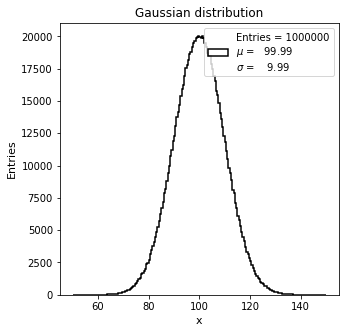

In [13]:
r = mean - 5 * sigma, mean + 5 * sigma
(_) = h1d(e, bins=200, range = r, pltLabels=PlotLabels(x='x', y='Entries', title='Gaussian distribution'),  figsize=(5,5))

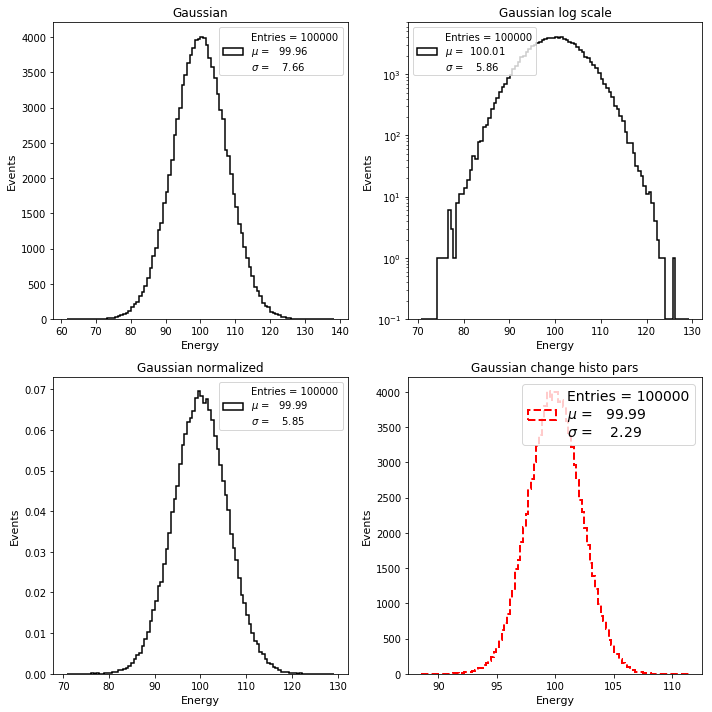

In [14]:
gaussian_histo_example(mean = 100, nevt=1e+5)

#### Fitting a gaussian to the distribution

In [23]:
fc = fit_energy(e, nbins=100, range=(0,200), n_sigma =3)

  Fit was valid = True
 Emu       = 99.99257815838453 +-0.01015022250688717 
 E sigma   = 10.001368856652881 +-0.007615034451974391 
 chi2    = 0.9212790289450851 
 sigma E/E (FWHM)     (%) =23.504961314134786
 sigma E/E (FWHM) Qbb (%) =3.035711737512324 


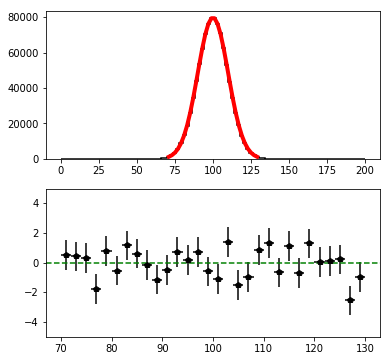

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2, 1, 1)
plot_fit_energy(fc)
ax = fig.add_subplot(2, 1, 2)
plot_fit_energy_chi2(fc)
print_fit_energy(fc)

### run many gaussian experiments and show the pull

In [67]:
mean = 1e+4
std  = 0.02
sigma = mean * std
exps = gaussian_experiments(mexperiments = 1000, nsample =10000, mean=mean, std = sigma)

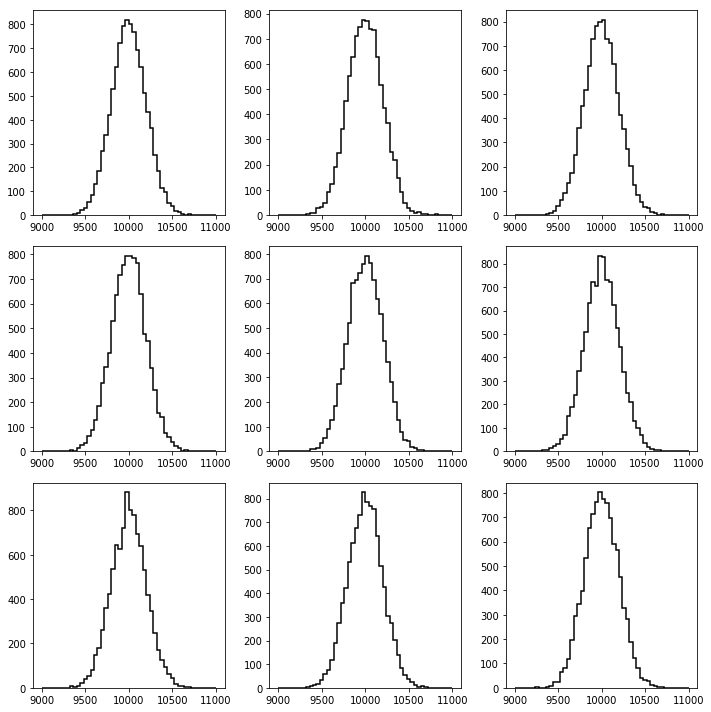

In [68]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (9e+3,11e+3), samples=9, canvas=(3,3), figsize=(10,10))

In [78]:
fcs = fit_gaussian_experiments(exps, nbins = 50, range =(9e+3, 11e+3), n_sigma =3)

In [79]:
mus, umus, stds, ustds, chi2s = gaussian_params_from_fcs(fcs)

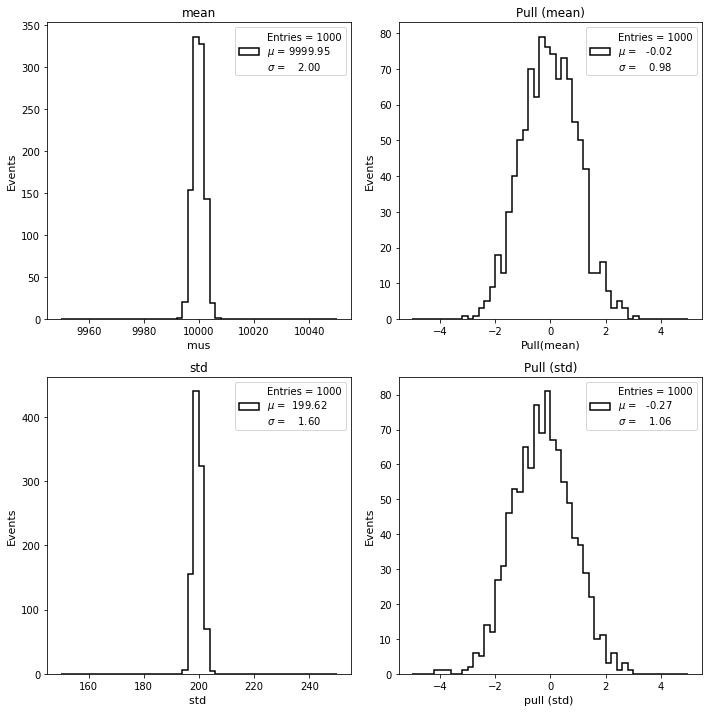

In [80]:
histo_gaussian_params_and_pulls(mean, sigma, mus, umus, stds, ustds, figsize=(10,10))

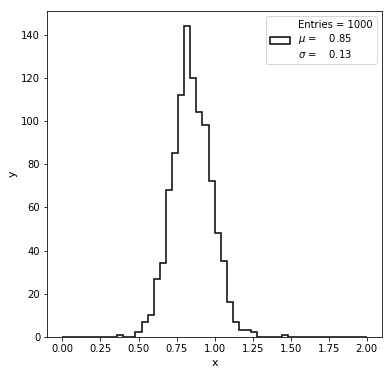

In [81]:
(_) = h1d(chi2s, bins = 50, range =(0,2))

### Show that the difference between the gaussian parameters estimated with a fit and the statistical estimator (mean, std) is gaussian

In [82]:
means, stds, exps = gaussian_experiments_variable_mean_and_std(mexperiments = 1000,
                                                  nsample      = 100,
                                                  mean_range   = (100, 1000),
                                                  std_range    = (1, 50))

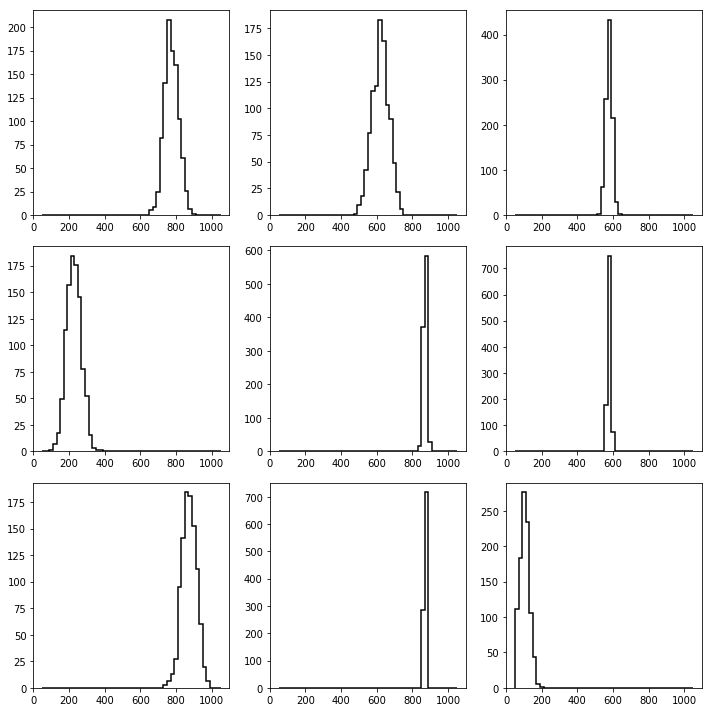

In [83]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (50,1050), samples=9, canvas=(3,3), figsize=(10,10))

In [85]:
SEED, MU, STD, AVG, RMS, CHI2 = fit_gaussian_experiments_variable_mean_and_std(means, 
                                                                               stds, 
                                                                               exps, 
                                                                               bins = 50, 
                                                                               n_sigma=3)

 fit failed for seed  = GaussPar(mu=Measurement(value=656.0674184340863, uncertainty=1.3185902186758445), std=Measurement(value=41.65576556082046, uncertainty=0.932851562867346), amp=Measurement(value=50.54909901392623, uncertainty=2.3383121035170076)), due to RunTimeWarning, retry fit 
 fit failed for seed  = GaussPar(mu=Measurement(value=301.8849335005747, uncertainty=1.2923303687203216), std=Measurement(value=40.846635897401455, uncertainty=0.9142732760581328), amp=Measurement(value=49.406652388738415, uncertainty=2.2917432445068298)), due to RunTimeWarning, retry fit 
 fit failed for seed  = GaussPar(mu=Measurement(value=278.2295939569618, uncertainty=1.461883599558365), std=Measurement(value=46.136268206510714, uncertainty=1.034227127262369), amp=Measurement(value=47.10404511658502, uncertainty=2.5924229595862482)), due to RunTimeWarning, retry fit 
 fit failed for seed  = GaussPar(mu=Measurement(value=776.9855112180288, uncertainty=0.8326135398391912), std=Measurement(value=26.30

In [86]:
mean  = np.array([x.value for x in SEED])
sigma = np.array([x.uncertainty for x in SEED])

In [87]:
avg = np.array([x.value for x in AVG])
avg_u = np.array([x.uncertainty for x in AVG])
rms = np.array([x.value for x in RMS])
rms_u = np.array([x.uncertainty for x in RMS])

In [88]:
mu = np.array([x.value for x in MU])
mu_u = np.array([x.uncertainty for x in MU])
std = np.array([x.value for x in STD])
std_u = np.array([x.uncertainty for x in STD])

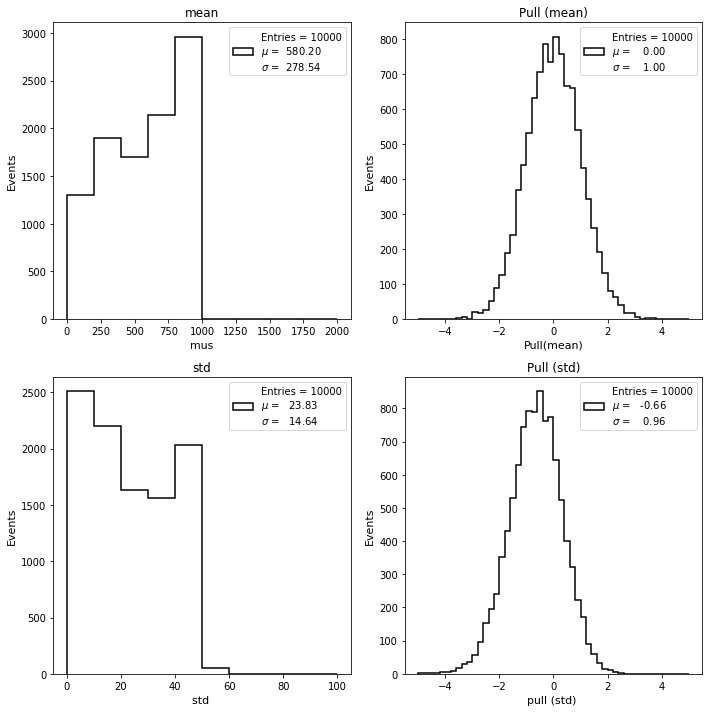

In [89]:
histo_gaussian_params_and_pulls(mean, sigma, avg, avg_u, rms, rms_u,
                                bin_mus    = 10,
                                bin_stds   = 10,
                                bin_pull   = 50,
                                range_mus  = (0, 2000),
                                range_stds = (0, 100),
                                range_pull = (-5,5),
                                figsize=(10,10))

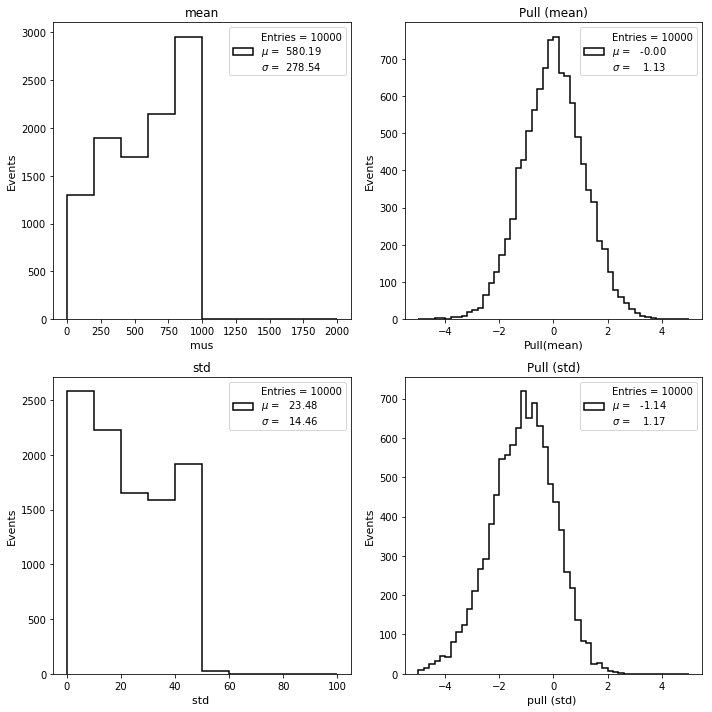

In [90]:
histo_gaussian_params_and_pulls(mean, sigma, mu, mu_u, std, std_u,
                                bin_mus    = 10,
                                bin_stds   = 10,
                                bin_pull   = 50,
                                range_mus  = (0, 2000),
                                range_stds = (0, 100),
                                range_pull = (-5,5),
                                figsize=(10,10))

#### The avg and rms of the gaussian distributions are slighly better behaved that those of the fits

- Pull is better for the avg and the rms than for the mu and std
- mu is unbiased in both cases but rms less umbiased than std

## Exponential fits

In [91]:
Nevt  = int(1e5)
e0 = 1e+4 # pes
std = 0.05 * e0
lt = 2000 # lifetime in mus
nbins_z = 12
range_z = (1, 500)

### generate data

In [92]:
z, es = energy_lt_experiment(Nevt, e0, lt, std)                         

In [93]:
zc, emean_z, esigma_z     = fitf.profileX(z, es, nbins_z, range_z)

In [94]:
esigma_z

array([5.57047953, 5.47487372, 5.47228069, 5.51391521, 5.55273414,
       5.396565  , 5.5395056 , 5.4932047 , 5.49295498, 5.57036542,
       5.50607832, 5.39161511])

In [95]:
emean_z

array([9893.39132468, 9686.05745065, 9491.0366505 , 9304.11954164,
       9099.85260542, 8914.55391157, 8726.54942149, 8552.46306223,
       8368.79789482, 8199.93717037, 8033.91399295, 7869.03560831])

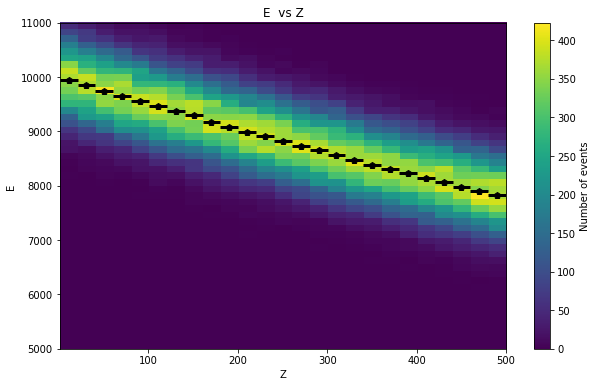

In [96]:
nevt = h2d(z, es, 25, 50, (1,500), (5e+3, 11e+3), 
           pltLabels=PlotLabels(x='Z', y='E ', title='E  vs Z'),
           profile=True,
           figsize=(10,6))

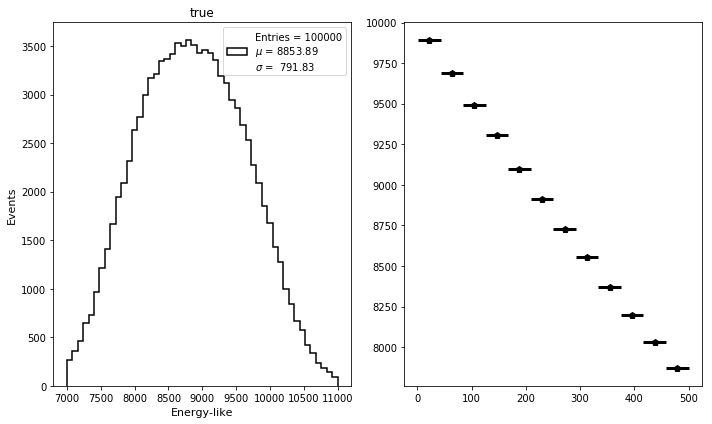

In [97]:
plot_energy_vs_z_histo_and_profile(es, zc, emean_z, esigma_z,
                                   bins_e = 50, range_e = (7e+3,11e+3),
                                   figsize=(10,6))

### Profile fit

In [98]:
x, y, yu     = fitf.profileX(z, es, nbins_z, range_z)
#valid_points = yu > 0
valid_points = ~np.isnan(yu)

x    = x [valid_points]
y    = y [valid_points]
yu   = yu[valid_points]
seed = expo_seed(x, y)
f    = fitf.fit(fitf.expo, x, y, seed, sigma=yu)

In [99]:
c2    = chi2(f, x, y, yu)
par  = np.array(f.values)
par[1] = - par[1]
err  = np.array(f.errors)

In [100]:
print(f' E0 = {par[0]} +- {err[0]}')
print(f' lt = {par[1]} +- {err[1]}')
print(f' chi2 = {c2}')

 E0 = 10002.640135937943 +- 3.402362946062788
 lt = 1994.6465662957394 +- 4.989606060054952
 chi2 = 0.6386419653583167


In [105]:
(_), fp, fr = fit_lifetime_profile(z, es, nbins_z, range_z)

In [106]:
fr

FitResult(par=array([10002.64013594,  1994.6465663 ]), err=array([3.40236295, 4.98960606]), chi2=0.6386419653583167, valid=True)

In [107]:
fp, fp2, fr = fit_lifetime_unbined(z, es, nbins_z, range_z)

In [108]:
fr

FitResult(par=array([9990.26000831, 1988.39381027]), err=array([3.62038209, 4.95774739]), chi2=0.647359919794382, valid=True)

### Fit lifetime  data to binned and unbinned mode

In [109]:

ti = time.time()
fc = fit_lifetime(z, es, 
                  nbins_z=nbins_z, 
                  nbins_e=50, 
                  range_z=(0, 500), 
                  range_e=(7000, 11000),
                  fit = FitType.profile)
tf = time.time()
print(f't = {tf -ti}')

t = 0.008793115615844727


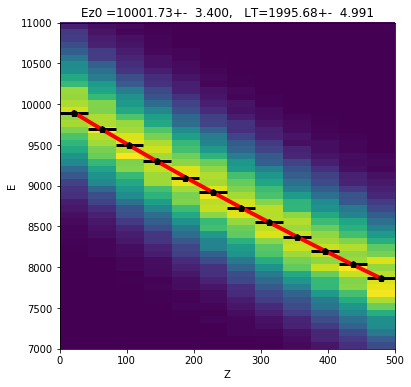

In [116]:
fig = plt.figure(figsize=(6,6))
ax      = fig.add_subplot(1, 1, 1)
plot_fit_lifetime(fc)

In [117]:
print_fit_lifetime(fc)

 Ez0     = 10001.729483135832 +-3.399597500641363 
 LT      = 1995.684440228196 +-4.991267221999551 
 chi2    = 0.6858244170922577 


In [118]:
ti = time.time()
fcu = fit_lifetime(z, es, 
                   nbins_z=nbins_z, 
                   nbins_e=50, 
                   range_z=(0, 500), 
                   range_e=(7000, 11000),
                  fit = FitType.unbined,)
tf = time.time()
print(f't = {tf -ti}')

t = 0.029497861862182617


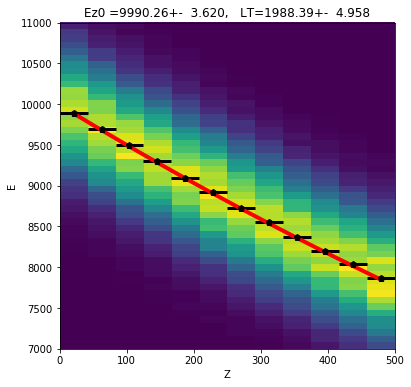

In [119]:
fig = plt.figure(figsize=(6,6))
ax      = fig.add_subplot(1, 1, 1)
plot_fit_lifetime(fcu)

In [120]:
print_fit_lifetime(fcu)

 Ez0     = 9990.260008314182 +-3.6203820892136385 
 LT      = 1988.3938102672632 +-4.957747385479458 
 chi2    = 0.7115554242801101 


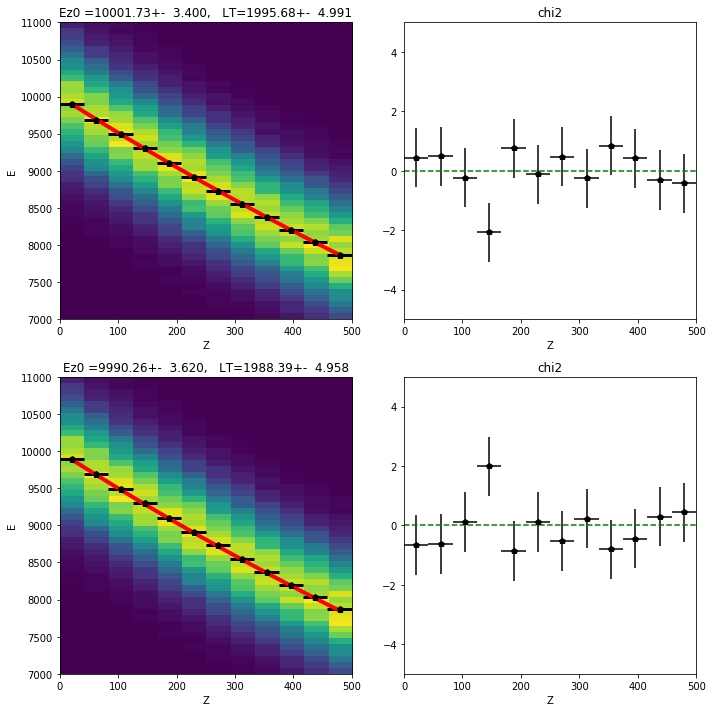

In [122]:
fig = plt.figure(figsize=(10,10))
ax      = fig.add_subplot(2, 2, 1)
plot_fit_lifetime(fc)

ax      = fig.add_subplot(2, 2, 2)
plot_fit_lifetime_chi2(fc)

ax      = fig.add_subplot(2, 2, 3)
plot_fit_lifetime(fcu)

ax      = fig.add_subplot(2, 2, 4)
plot_fit_lifetime_chi2(fcu)

plt.tight_layout()


### Run experiments

In [ ]:
fit_lifetime_experiments(zs      : np.array,
                             es      : np.array,
                             nbins_z : int      ,
                             nbins_e : int      ,
                             range_z : Range    ,
                             range_e : Range    ,
                             fit     : FitType  = FitType.unbined)

In [148]:
mexperiments = 1e+3
nsample      = 1e+3
e0 = 1e+4 # pes
std = 0.05 * e0
lt = 2000 # lifetime in mus
nbins_z = 12
range_z = (1, 500)
zs, es = energy_lt_experiments(mexperiments, nsample, e0, lt, std)

In [149]:
fcp = fit_lifetime_experiments(zs, es, nbins_z=12, nbins_e = 50, 
                               range_z = (1, 500), range_e = (7e+3, 11e+3), 
                               fit=FitType.profile)

In [150]:
fcu = fit_lifetime_experiments(zs, es, nbins_z=12, nbins_e = 50, 
                               range_z = (1, 500), range_e = (7e+3, 11e+3), 
                               fit=FitType.unbined)

In [151]:
e0s, ue0s, lts,ults, chi2p = lt_params_from_fcs(fcp)

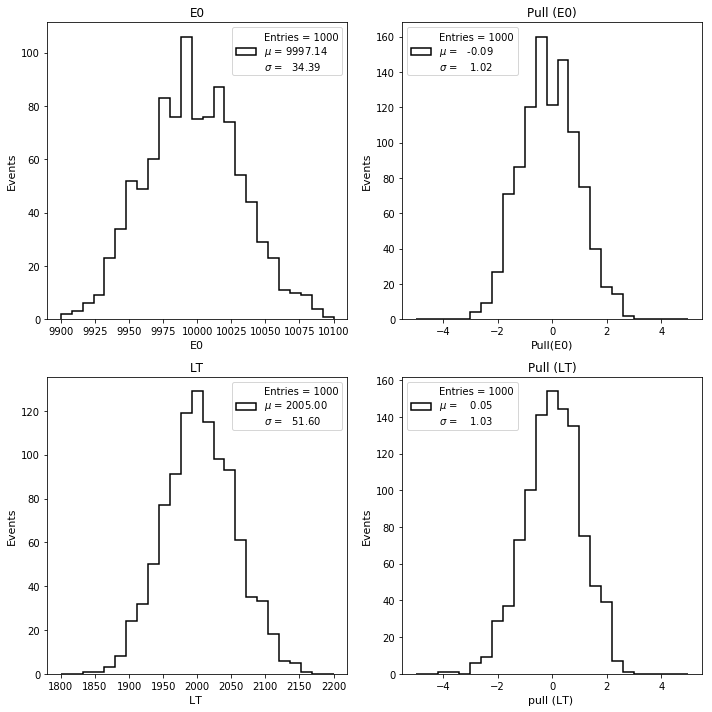

In [153]:
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9900,10100),
                          range_lts  = (1800,2200),
                          range_pull = (-5,5),figsize=(10,10))

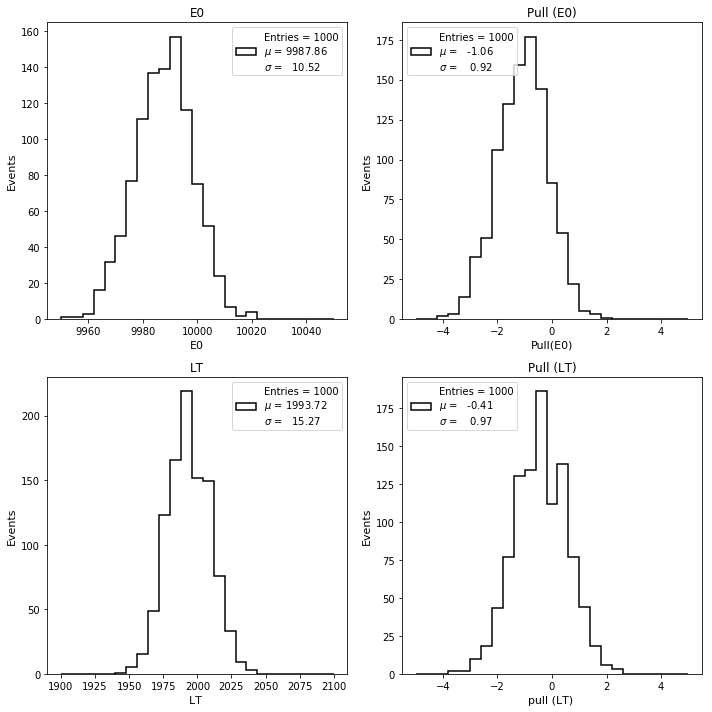

In [128]:
e0s, ue0s, lts,ults, chi2u = lt_params_from_fcs(fcu)
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9950,10050),
                          range_lts  = (1900,2100),
                          range_pull = (-5,5),figsize=(10,10))

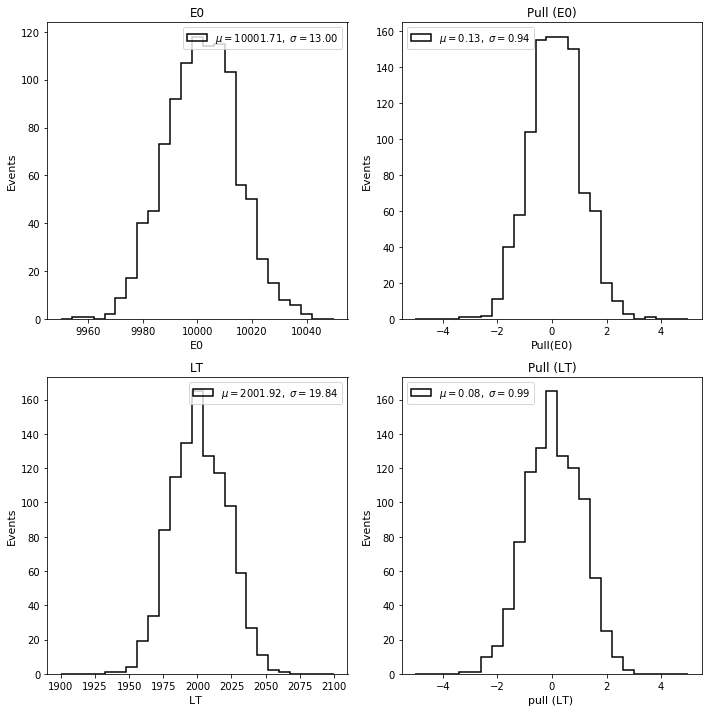

In [207]:
e0s, ue0s, lts,ults, chi2u2 = lt_params_from_fcs(fcu2)
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, 
                          bin_e0s    = 25,
                          bin_lts    = 25,
                          bin_pull   = 25,
                          range_e0s  = (9950,10050),
                          range_lts  = (1900,2100),
                          range_pull = (-5,5),figsize=(10,10))

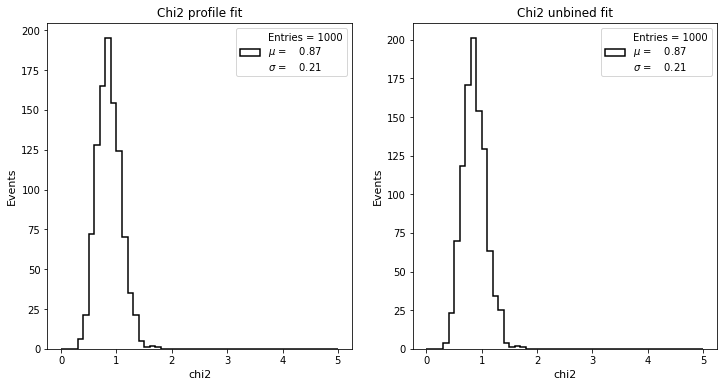

In [129]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)
pltLabels =PlotLabels(x='chi2', y='Events', title='Chi2 profile fit')
(_) = h1(chi2p, bins=50, range=(0,5))
plot_histo(pltLabels, ax)

ax = fig.add_subplot(1, 2, 2)
pltLabels =PlotLabels(x='chi2', y='Events', title='Chi2 unbined fit')
(_) = h1(chi2u, bins=50, range=(0,5))
plot_histo(pltLabels, ax)


## Selection in band

In [130]:
Nevt  = int(1e6)
e0 = 12e+3 # pes
std = 0.02 * e0
lt = 2000 # lifetime in mus

e02 = 8e+3
std2 = 0.02 * e02
lt2 = 1500 # lifetime in mus
nbins_z = 50
range_z = (1,500)

nbins_e0 = 50
range_e0 = (1000,15000)

zbins  = np.linspace(*range_z, nbins_z + 1)
ebins  = np.linspace(*range_e0, nbins_e0 + 1)

In [131]:
z1, e1 = energy_lt_experiment(Nevt, e0, lt, std,   zmin=1, zmax =  500)
z2, e2 = energy_lt_experiment(Nevt, e02, lt2, std2, zmin=1, zmax =  500)

In [132]:
z  = np.concatenate((z1, z2))
es = np.concatenate((e1, e2))
zc, emean_z, esigma_z     = fitf.profileX(z, es, nbins_z)

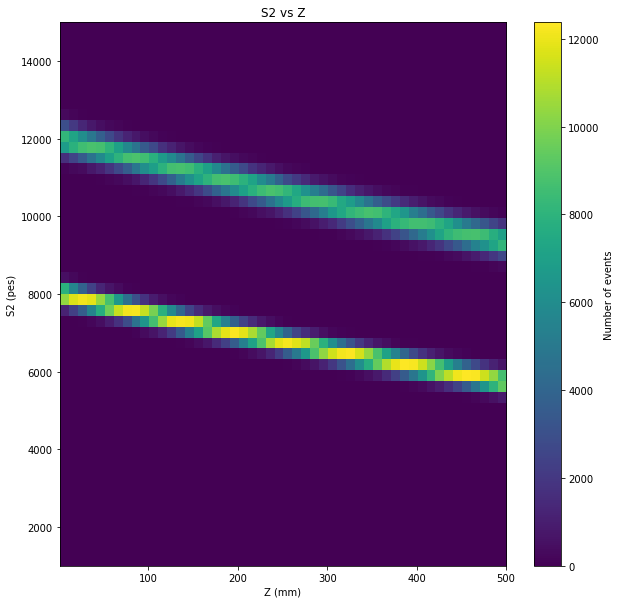

In [133]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 1, 1)
nevt, *_  = plt.hist2d(z, es, (zbins, ebins))    
plt.colorbar().set_label("Number of events")
labels(PlotLabels("Z (mm)", "S2 (pes)", f"S2 vs Z"))

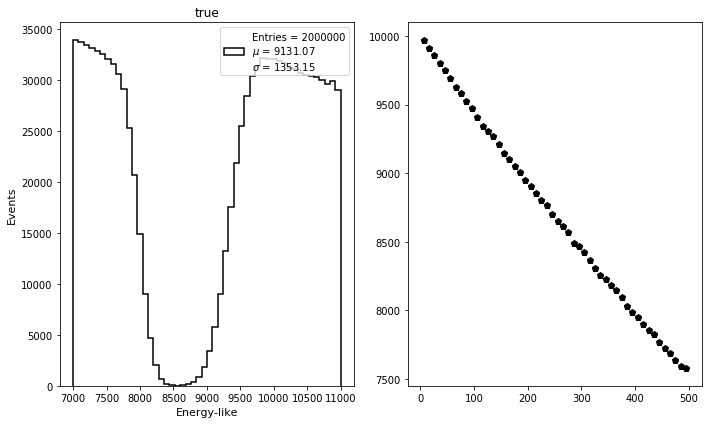

In [134]:
plot_energy_vs_z_histo_and_profile(es, zc, emean_z, esigma_z,
                                   bins_e = 50, range_e = (1e+3,13e+3),
                                   figsize=(10,6))

In [140]:
sel_inband, fpl, fph, hp, pp = selection_in_band(z, es,
                                                 range_z = (1, 500),
                                                 range_e = (8.5e+3,13e+3),
                                                 nbins_z = 25,
                                                 nbins_e = 100,
                                                 nsigma  = 3.5)

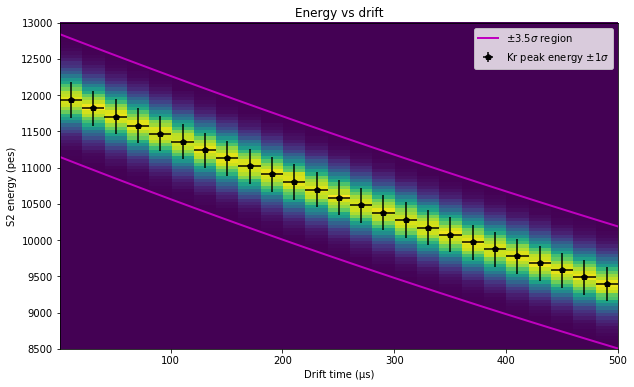

In [141]:
plot_selection_in_band(fpl, fph, hp, pp)

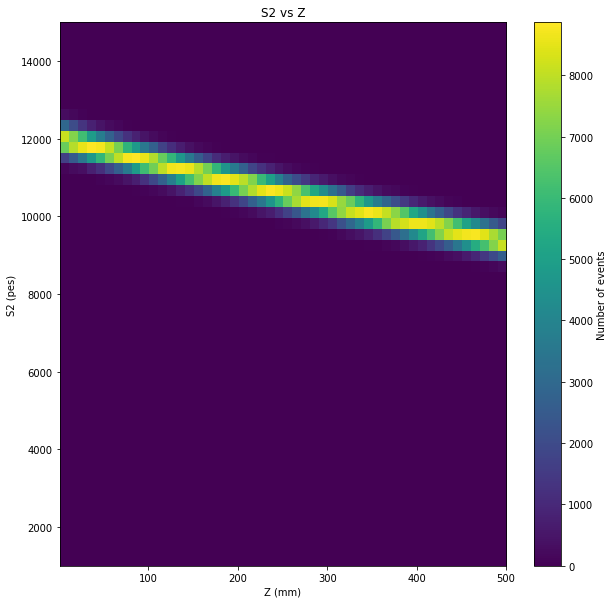

In [142]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 1, 1)
nevt, *_  = plt.hist2d(z[sel_inband], es[sel_inband], (zbins, ebins))    
plt.colorbar().set_label("Number of events")
labels(PlotLabels("Z (mm)", "S2 (pes)", f"S2 vs Z"))